In [1]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt

In [19]:
N = 35
arena_r = 20.0
interac_r = 7.0
exclusion_r = 0.0
df = pd.read_csv(f'positions_and_contacts/{N}_bots/contact_list_001_ar_{arena_r}_er_{exclusion_r}_ir_{interac_r}.txt', sep='\s+',header=None)

In [20]:
g = ig.Graph.DataFrame(df, directed=False)

In [21]:
#g.summary(verbosity=1)
g.vcount()

34

In [22]:
vertices_ids = [v['name'] for v in g.vs]

In [23]:
print(vertices_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [24]:
lacking_vertices = [i for i in range(1,N+1) if i not in vertices_ids]

In [25]:
print(lacking_vertices)

[23]


In [26]:
# Add the lacking vertex without any contact
for v in lacking_vertices:
    g.add_vertex(name=v)

In [27]:
vertices_ids = [v['name'] for v in g.vs]

In [28]:
print(vertices_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 23]


In [29]:
posdf = pd.read_csv(f'positions_and_contacts/35_bots/bots_xy_positions_001_ar_{arena_r}_er_{exclusion_r}.txt', sep='\s+',header=None, index_col=False)

In [30]:
posdf.head()

,0,1,2
0,1,-9.856455,15.920046
1,2,7.053127,4.759779
2,3,3.095629,-15.520381
3,4,-15.663328,0.419724
4,5,1.550559,8.600322


In [31]:
posdf.rename(columns={0:'bot_id', 1:'x', 2:'y'}, inplace=True)

In [32]:
true_layout = []
for i in vertices_ids:
    x, y = float(posdf.loc[posdf['bot_id']==i]['x']), float(posdf.loc[posdf['bot_id']==i]['y'])
    true_layout.append([x, y])

In [16]:
print(true_layout)

[[-15.28292649, -4.82750433], [-0.29115901, -17.20397978], [-13.80762741, -8.50851163], [-1.69057847, 11.07331296], [-2.88366195, -13.85648858], [0.02580913, -11.16592172], [1.88729313, -0.54527322], [-3.87555711, -10.2962526], [15.00981335, 2.3985352], [8.49507812, 2.85362116], [-3.32777423, 6.53254855], [2.57833618, 4.30660907], [3.02687337, -4.38919659], [6.43140239, 5.37539174], [11.51376122, -7.36574993], [8.02429048, -16.38401919], [-11.62087954, 0.34669035], [-7.29172487, 6.11599797], [-16.08866045, -0.34305257], [12.91729866, -10.82778373], [-6.54685708, -12.03345812], [9.28309609, 6.55578343], [7.42698641, -9.80694032], [-4.09340633, -6.3657224], [-7.5088405, -4.31856754], [3.73022721, -16.26291057], [14.91180557, -1.51581456], [14.9351637, 10.08861788], [3.54745962, 8.07770595], [9.8245379, -12.67955886], [12.2620054, 0.64503632], [3.97044563, -8.18803668], [0.42073049, -7.87049153], [-10.87199323, 4.14967012], [-4.06658803, 17.71807093]]


In [17]:
true_layout = ig.Layout(true_layout)

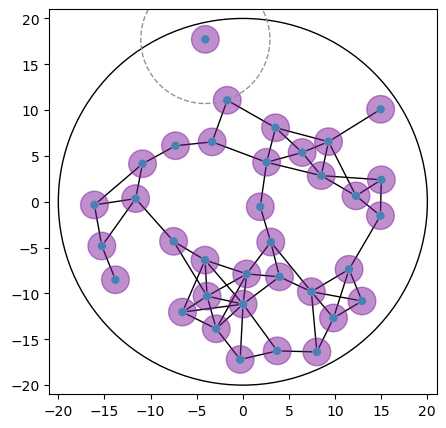

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    layout=true_layout,
    vertex_size=5,
    vertex_color="steelblue",
    #vertex_color=["steelblue" if gender == "M" else "salmon" for gender in g.vs["gender"]],
    vertex_frame_width=2.0,
    vertex_frame_color="white",
    #vertex_label=g.vs["name"],
    #vertex_label_size=7.0,
    #edge_width=[2 if married else 1 for married in g.es["married"]],
    #edge_color=["#7142cf" if married else "#AAA" for married in g.es["married"]]
)
circle = plt.Circle([0.0, 0.0], arena_r, fill=False, edgecolor='k')
ax.add_patch(circle)
ax.set_xlim(-(arena_r+1),arena_r+1)
ax.set_ylim(-(arena_r+1),arena_r+1)
for i in range(N):
    coords = true_layout[i]
    circle = plt.Circle(tuple(coords), exclusion_r, color='xkcd:purple', alpha=0.5, clip_on=False)
    ax.add_patch(circle)
#extra: radi interacció pel bot id 3, que sembla que no té veins
circle = plt.Circle(true_layout[-1], interac_r, fill=False, edgecolor='xkcd:grey', ls='--')
ax.add_patch(circle)
fig.savefig(f'network_N_{N}_ar_{arena_r}_ir_{interac_r}_er_{exclusion_r}.png')

In [94]:
#g.maximal_cliques()
print(g.components())

Clustering with 35 elements and 2 clusters
[0] 1, 2, 3, 4, 6, 8, 11, 12, 13, 14, 15, 17, 18, 21, 23, 25, 26, 27, 29, 30,
    31, 32, 33, 34, 35
[1] 5, 7, 9, 10, 16, 19, 20, 22, 24, 28


In [95]:
compos = g.components()

In [97]:
type(compos[0])

list

In [101]:
import numpy as np
b = np.array([1] * 3)
b = b/1
print(b)

[1. 1. 1.]
